<a href="https://colab.research.google.com/github/iceman025/house-price/blob/main/P02_Project_Submission08021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
# load library
library('ggplot2')
library('dplyr') 
install.packages('randomForest')
library('randomForest') 
library("tidyverse")
library(rpart) 
library(randomForest) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [113]:
install.packages("textir")
library(textir) ## standardize the data
library(class) ##  knn
library(ggplot2) # visualization
install.packages("ggthemes")
library(ggthemes) # visualization
library(scales) # visualization
library(dplyr) # data manipulation
library(randomForest) # random forest
install.packages("corrplot")
library(corrplot) # correlation
install.packages("gridExtra")
library(gridExtra)
install.packages("GGally")
library(GGally)
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [138]:
# load data 
house_train <- read.csv('https://raw.githubusercontent.com/iceman025/house-price/main/train.csv')
house_test <-read.csv('https://raw.githubusercontent.com/iceman025/house-price/main/test.csv')
dim(house_train)
str(house_train)

[1] 1460   81

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


In [115]:
#Count the number of columns that consists of text data
sum(sapply(house_train[,1:81], typeof) == "character")
#Count the number of columns that consists of numerical data
sum(sapply(house_train[,1:81], typeof) == "integer")

[1] 43

[1] 38

In [116]:
# Check missing values . Identify the columns which have missing values 
mvc = 0
for (i in 1:ncol(house_train))
{
  m = sum(is.na(house_train[,i]))
  print(paste("Column ",colnames(house_train[i])," has ",m," missing values"))
  if(m>0){
    mvc = mvc+1
  }
  else{
    mvc
    }
}  
print(paste("Dataset has overall ",mvc," columns with missing values"))
# from the results, there are a number of missing values of columns which will be adjusted below

[1] "Column  Id  has  0  missing values"
[1] "Column  MSSubClass  has  0  missing values"
[1] "Column  MSZoning  has  0  missing values"
[1] "Column  LotFrontage  has  259  missing values"
[1] "Column  LotArea  has  0  missing values"
[1] "Column  Street  has  0  missing values"
[1] "Column  Alley  has  1369  missing values"
[1] "Column  LotShape  has  0  missing values"
[1] "Column  LandContour  has  0  missing values"
[1] "Column  Utilities  has  0  missing values"
[1] "Column  LotConfig  has  0  missing values"
[1] "Column  LandSlope  has  0  missing values"
[1] "Column  Neighborhood  has  0  missing values"
[1] "Column  Condition1  has  0  missing values"
[1] "Column  Condition2  has  0  missing values"
[1] "Column  BldgType  has  0  missing values"
[1] "Column  HouseStyle  has  0  missing values"
[1] "Column  OverallQual  has  0  missing values"
[1] "Column  OverallCond  has  0  missing values"
[1] "Column  YearBuilt  has  0  missing values"
[1] "Column  YearRemodAdd  has  0  miss

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


[1] 10624

[1] 13137.37

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


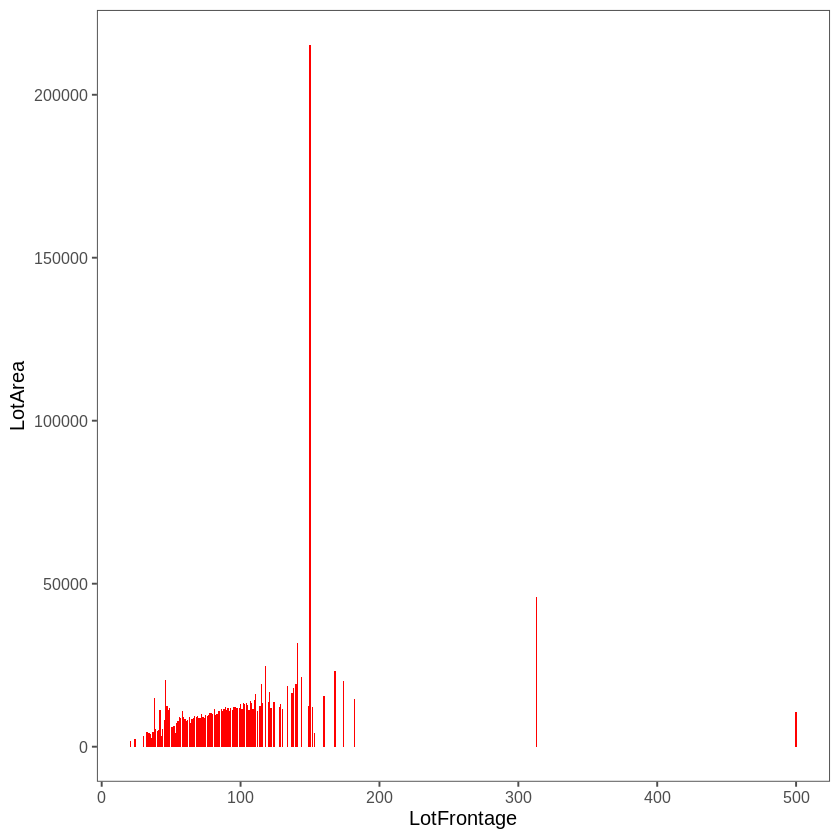

 Factor w/ 3 levels "Grvl","No alley access",..: 2 2 2 2 2 2 2 2 2 2 ...
[1] "Column  Id  has  0  missing values"
[1] "Column  MSSubClass  has  0  missing values"
[1] "Column  MSZoning  has  0  missing values"
[1] "Column  LotFrontage  has  0  missing values"
[1] "Column  LotArea  has  0  missing values"
[1] "Column  Street  has  0  missing values"
[1] "Column  Alley  has  0  missing values"
[1] "Column  LotShape  has  0  missing values"
[1] "Column  LandContour  has  0  missing values"
[1] "Column  Utilities  has  0  missing values"
[1] "Column  LotConfig  has  0  missing values"
[1] "Column  LandSlope  has  0  missing values"
[1] "Column  Neighborhood  has  0  missing values"
[1] "Column  Condition1  has  0  missing values"
[1] "Column  Condition2  has  0  missing values"
[1] "Column  BldgType  has  0  missing values"
[1] "Column  HouseStyle  has  0  missing values"
[1] "Column  OverallQual  has  0  missing values"
[1] "Column  OverallCond  has  0  missing values"
[1] "Column  YearBu

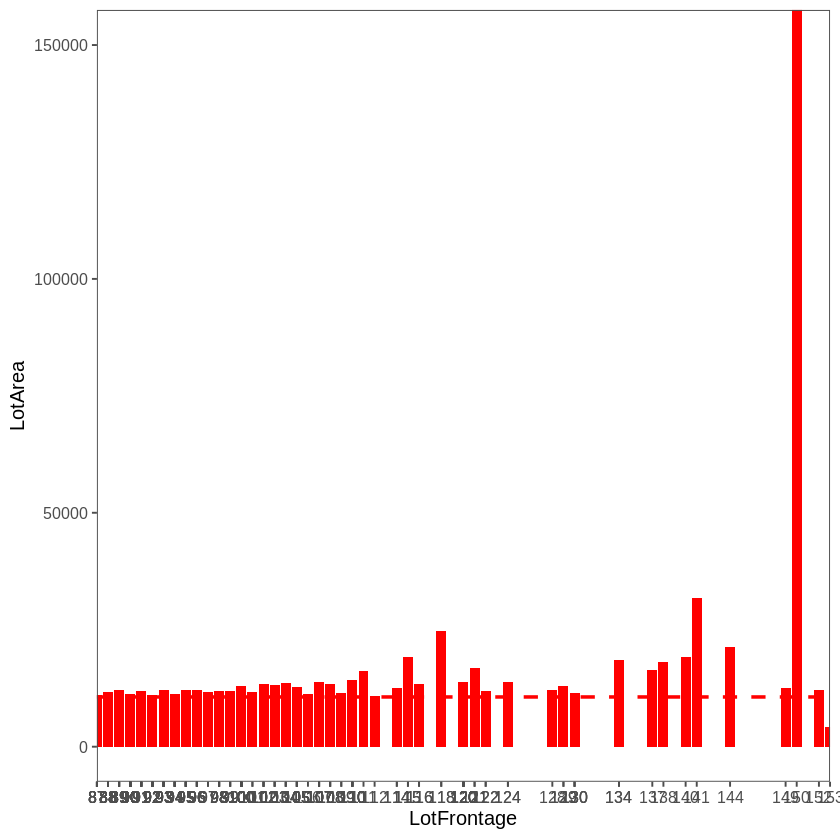

In [117]:
# Check LotFrontage and LotArea
# Assign LotFrontage values 500 to the missing value
# the missing values with price
house_train$LotFrontage[is.na(house_train$LotFrontage)] <- 500
# median of LotArea for each LotFrontage
ggplot(house_train, aes(x = LotFrontage, y = LotArea)) +
  stat_summary(fun.y = "median", geom  = "bar", fill="red")+
  labs(x = 'LotFrontage') +
 theme_few()

# Checking mean and median of LotArea for missing 
median(subset(house_train, house_train$LotFrontage == 500)$LotArea)
mean(subset(house_train, house_train$LotFrontage == 500)$LotArea)
# Plotting the median
plot1 <- ggplot(house_train, aes(x = LotFrontage, y = LotArea)) +
  stat_summary(fun.y = "median", geom  = "bar", fill="red")+geom_hline(aes(yintercept=10624), 
                                                                       colour='red', linetype='dashed', lwd=1)+
  labs(x = 'LotFrontage') +
  scale_x_continuous(breaks=house_train$LotFrontage) +
  theme_few()
# plot with "zoomed region"
plot1 + coord_cartesian(xlim = c(90,150),ylim= c(0,150000))
# Assign missing values of LotFrontage to 96 
house_train$LotFrontage[house_train$LotFrontage == 500] <- 96

# Alley access with NA means no alley access. replace it with empty or blank value
house_train$Alley <- as.character(house_train$Alley)
house_train$Alley[is.na(house_train$Alley)] <- 'No alley access'
house_train$Alley <- factor(house_train$Alley)
str(house_train$Alley)

# Missing value for MasVnrType, MasVnrArea and Electrical
# Since only 9 rows altoghether are missing ,omit them from the dataset
house_train <- house_train[!is.na(house_train$MasVnrType),]
house_train <- house_train[!is.na(house_train$Electrical),]

# Missing value for houses without basement 
house_train$BsmtQual <- as.character(house_train$BsmtQual)
house_train$BsmtQual[is.na(house_train$BsmtQual)] <- 'No Basement'
house_train$BsmtQual <- factor(house_train$BsmtQual)

house_train$BsmtCond <- as.character(house_train$BsmtCond)
house_train$BsmtCond[is.na(house_train$BsmtCond)] <- 'No Basement'
house_train$BsmtCond <- factor(house_train$BsmtCond)
house_train$BsmtExposure <- as.character(house_train$BsmtExposure)
house_train$BsmtExposure[is.na(house_train$BsmtExposure)] <- 'No Basement'
house_train$BsmtExposure <- factor(house_train$BsmtExposure)

house_train$BsmtFinType1 <- as.character(house_train$BsmtFinType1)
house_train$BsmtFinType1[is.na(house_train$BsmtFinType1)] <- 'No Basement'
house_train$BsmtFinType1 <- factor(house_train$BsmtFinType1)
house_train$BsmtFinType2 <- as.character(house_train$BsmtFinType2)
house_train$BsmtFinType2[is.na(house_train$BsmtFinType2)] <- 'No Basement'
house_train$BsmtFinType2 <- factor(house_train$BsmtFinType2)

# Missing value for fire  place
house_train$FireplaceQu <- as.character(house_train$FireplaceQu)
house_train$FireplaceQu[is.na(house_train$FireplaceQu)] <- 'No Fireplace'
house_train$FireplaceQu <- factor(house_train$FireplaceQu)

# Missing value for garage  
house_train$GarageType <- as.character(house_train$GarageType)
house_train$GarageType[is.na(house_train$GarageType)] <- 'No Garage'
house_train$GarageType <- factor(house_train$GarageType)
house_train$GarageYrBlt[is.na(house_train$GarageYrBlt)] <- 0
house_train$GarageFinish <- as.character(house_train$GarageFinish)
house_train$GarageFinish[is.na(house_train$GarageFinish)] <- 'No Garage'
house_train$GarageFinish <- factor(house_train$GarageFinish)
house_train$GarageQual <- as.character(house_train$GarageQual)
house_train$GarageQual[is.na(house_train$GarageQual)] <- 'No Garage'
house_train$GarageQual <- factor(house_train$GarageQual)
house_train$GarageCond <- as.character(house_train$GarageCond)
house_train$GarageCond[is.na(house_train$GarageCond)] <- 'No Garage'
house_train$GarageCond <- factor(house_train$GarageCond)
# Missing value for pool  
house_train$PoolQC <- as.character(house_train$PoolQC)
house_train$PoolQC[is.na(house_train$PoolQC)] <- 'No Pool'
house_train$PoolQC <- factor(house_train$PoolQC)
# Missing value for fence
house_train$Fence <- as.character(house_train$Fence)
house_train$Fence[is.na(house_train$Fence)] <- 'No Fence'
house_train$Fence <- factor(house_train$Fence)

# Missing value for other miscellaneous feature
house_train$MiscFeature <- as.character(house_train$MiscFeature)
house_train$MiscFeature[is.na(house_train$MiscFeature)] <- 'None'
house_train$MiscFeature <- factor(house_train$MiscFeature)

# Check if any missing values are there
mvc = 0
for (i in 1:ncol(house_train))
{
  m = sum(is.na(house_train[,i]))
  print(paste("Column ",colnames(house_train[i])," has ",m," missing values"))
  if(m>0){
    mvc = mvc+1
  }
  else{
    mvc
  }
}  
print(paste("Dataset has overall ",mvc," columns with missing values"))


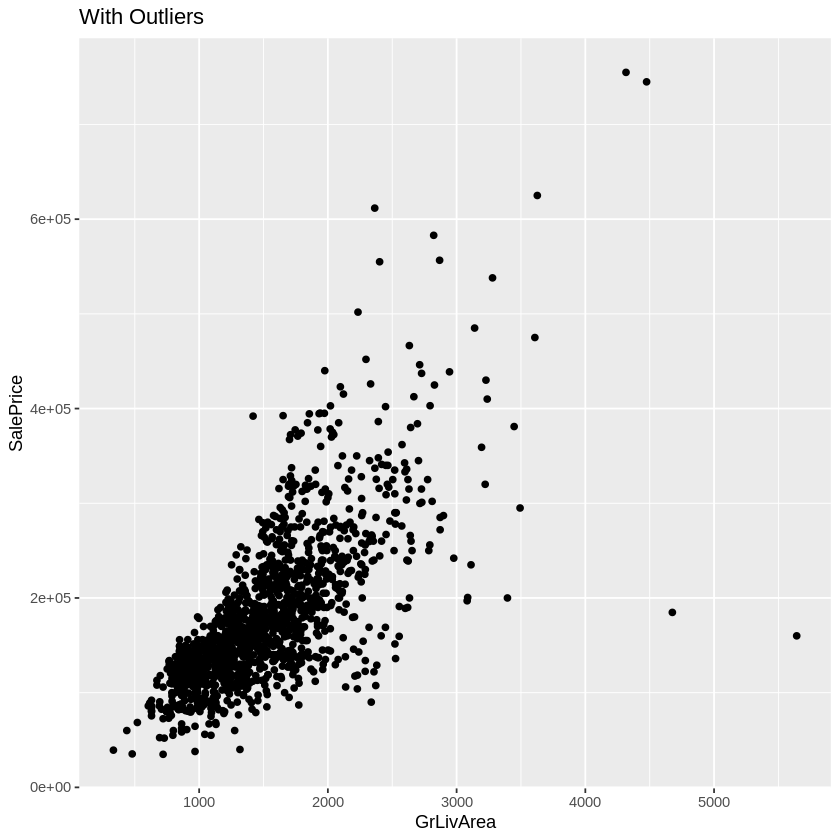

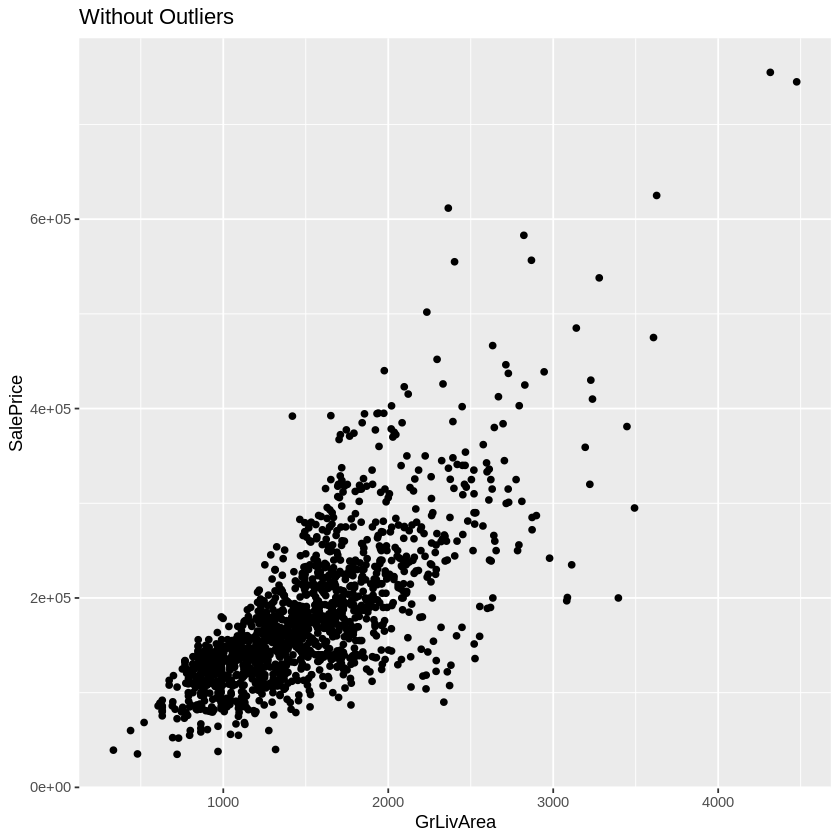

In [118]:
# data visulaziation, it seems there is a liner relationship
ggplot(house_train,aes(y=SalePrice,x=GrLivArea))+ggtitle("With Outliers")+geom_point()
house_train[house_train$GrLivArea>4000&house_train$SalePrice<2e+05,]$GrLivArea <- mean(house_train$GrLivArea)%>%as.numeric
ggplot(house_train,aes(y=SalePrice,x=GrLivArea))+ggtitle("Without Outliers")+geom_point()

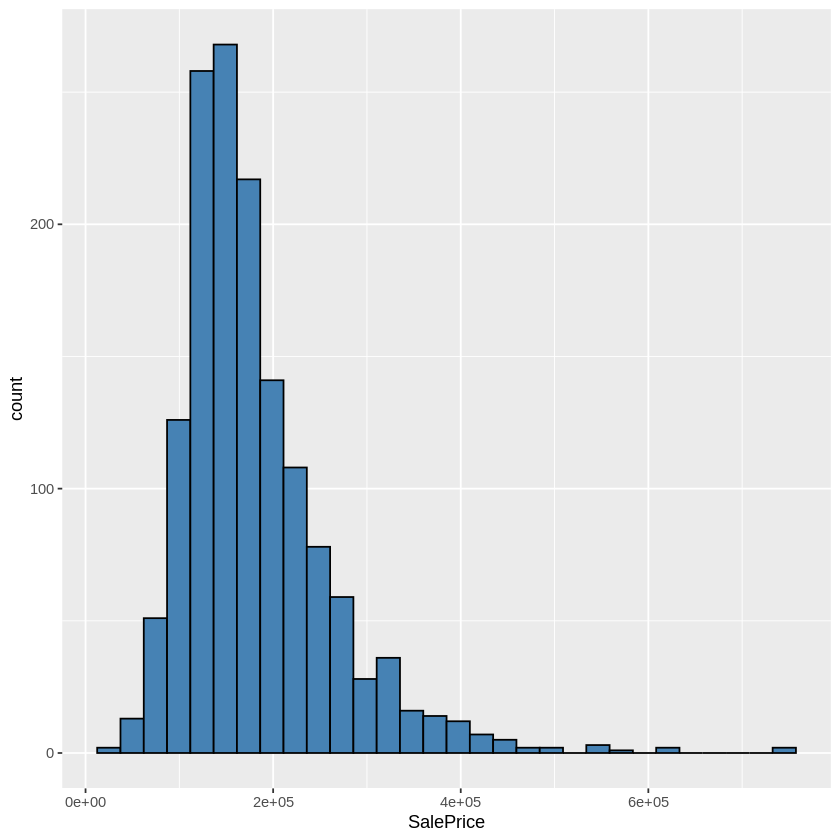

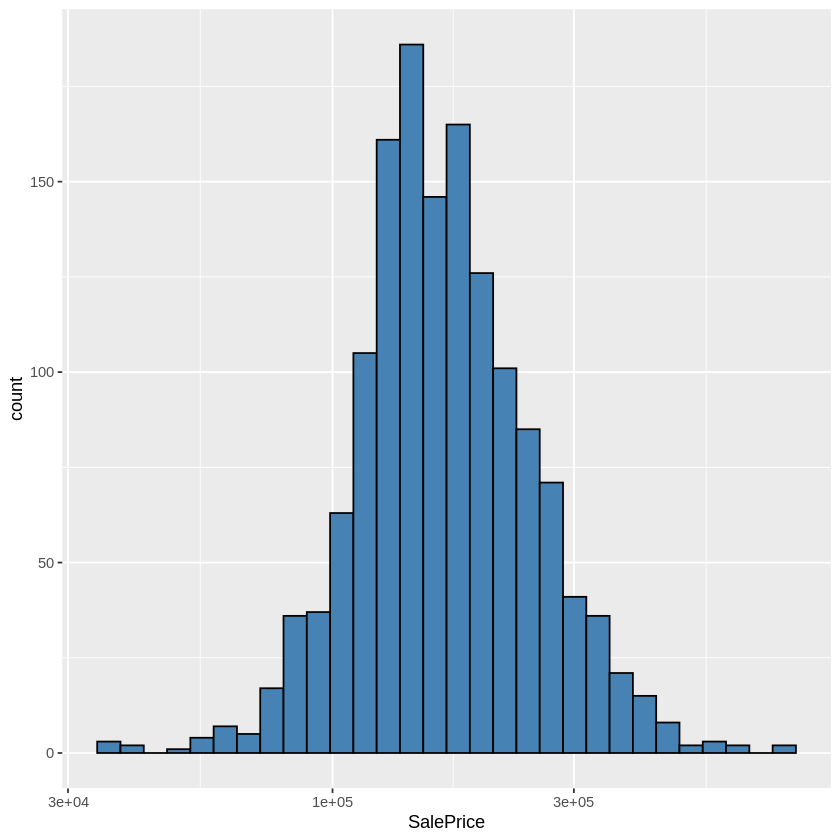

In [119]:
# data visualization, it seems there is normal distribution of price 
ggplot(house_train,aes(SalePrice))+geom_histogram(fill="steelblue",color="black",bins = 30)
ggplot(house_train,aes(SalePrice))+geom_histogram(fill="steelblue",color="black",bins = 30)+scale_x_log10()
house_train$SalePrice <- log(house_train$SalePrice+1)
house_test$SalePrice <- as.numeric(0)

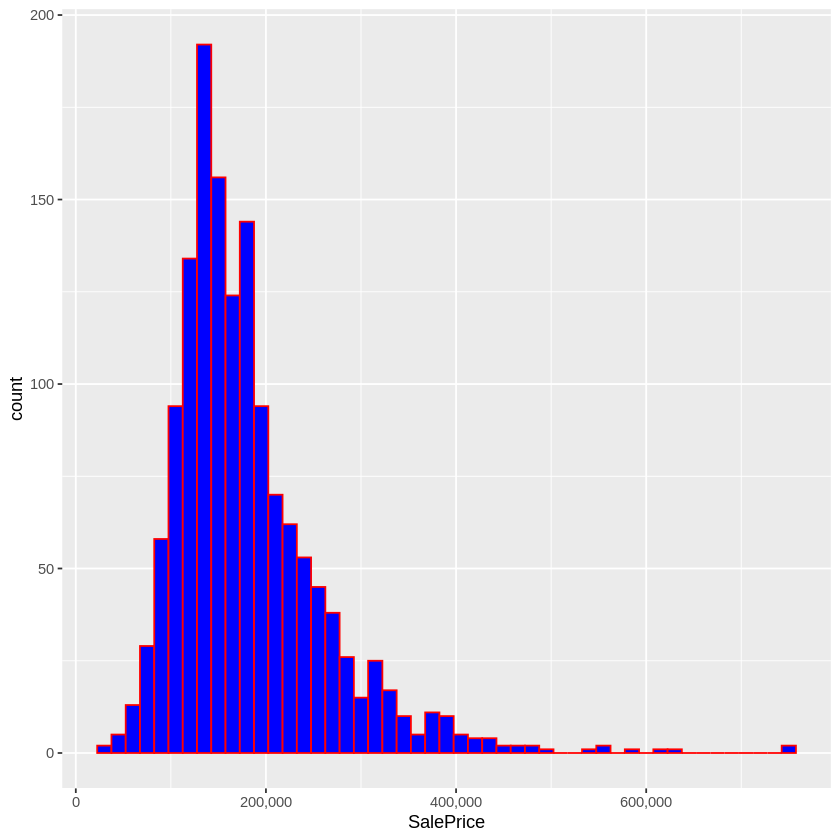

In [139]:
# sales price distribution- looks like normal distribution
require(scales)
ggplot(house_train, aes(x=SalePrice)) + geom_histogram(binwidth = 15000 ,color="red",fill="blue")+ scale_x_continuous(labels = comma)


`geom_smooth()` using formula 'y ~ x'



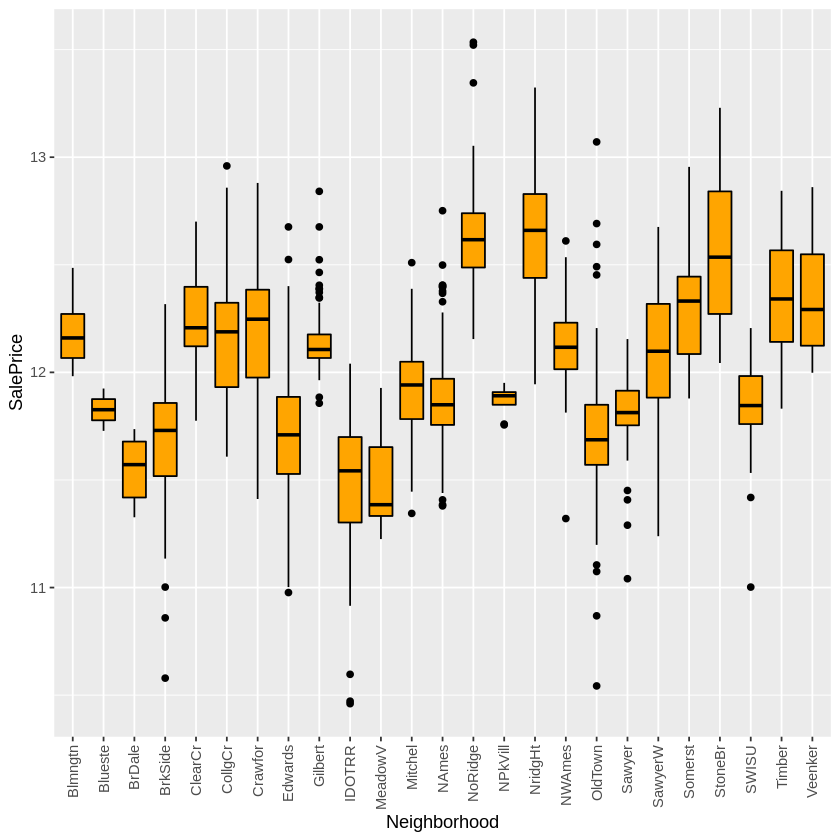

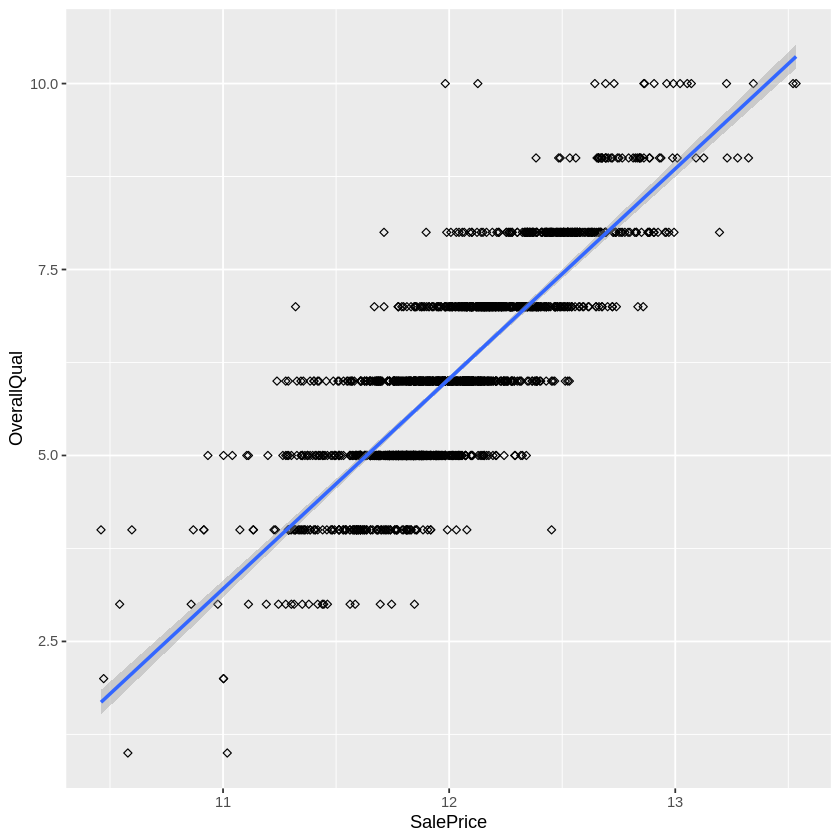

In [121]:
# Feature engineering: some features are useful, other are not 
ggplot(house_train, aes(x=Neighborhood,y=SalePrice)) + geom_boxplot(color="black", fill="orange")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
scale_y_continuous(labels = comma)

ggplot(house_train, aes(x=SalePrice,y=OverallQual)) + geom_point(shape=23) + geom_smooth(method="lm")

In [122]:
# build randomforest model
rf_model <- randomForest(SalePrice ~ .,  data = house_train,importance = T)
summary(rf_model)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       1451   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       1451   -none- numeric  
importance       160   -none- numeric  
importanceSD      80   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1451   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [123]:
# prediction of randomforest model
prediction <- predict(rf_model, data = test)
head(prediction)

1        2        3        4        5        6 
12.22738 12.03400 12.28116 12.08724 12.58893 11.94049

In [124]:
# calculate RMSE
RMSE <- function(x,y){
  a <- sqrt(sum((log(x)-log(y))^2)/length(y))
  return(a)
}

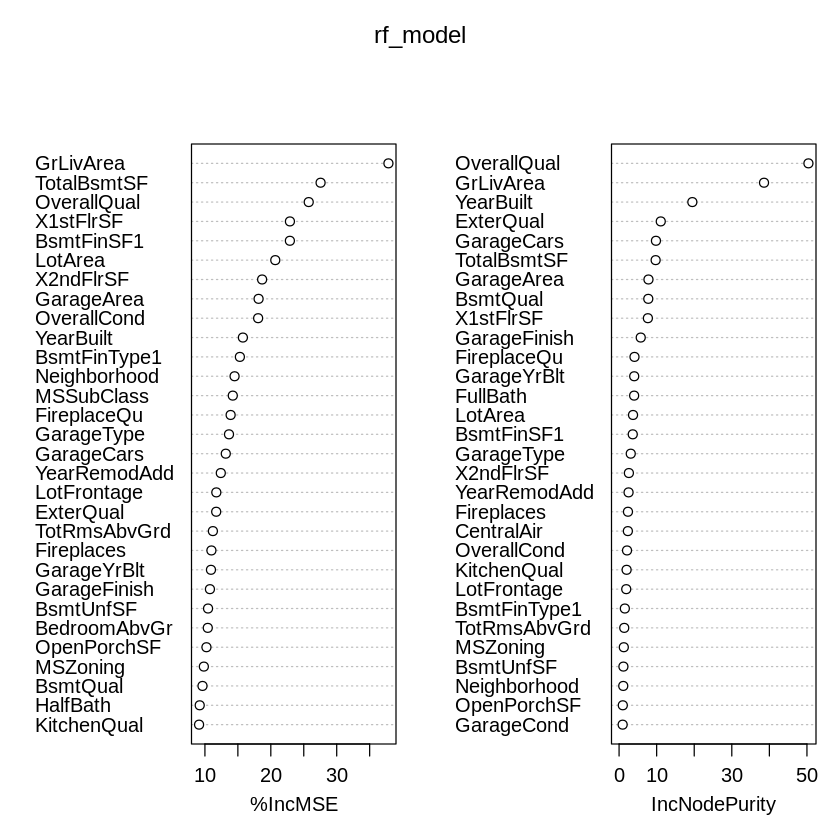

In [125]:
# importance ranking of variables 
importance    <- importance(rf_model)
varImpPlot(rf_model)

In [126]:
# build Linear Regression Model
lm_model <- lm(SalePrice ~ ., data=house_train)
summary(lm_model)


Call:
lm(formula = SalePrice ~ ., data = house_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67444 -0.04448  0.00337  0.05053  0.45864 

Coefficients: (7 not defined because of singularities)
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              8.312e+00  4.666e+00   1.781 0.075109 .  
Id                      -7.104e-06  6.833e-06  -1.040 0.298707    
MSSubClass              -4.035e-04  3.647e-04  -1.106 0.268767    
MSZoningFV               4.586e-01  5.299e-02   8.656  < 2e-16 ***
MSZoningRH               4.332e-01  5.244e-02   8.262 3.77e-16 ***
MSZoningRL               4.293e-01  4.511e-02   9.515  < 2e-16 ***
MSZoningRM               3.800e-01  4.226e-02   8.993  < 2e-16 ***
LotFrontage              4.385e-04  1.702e-04   2.576 0.010118 *  
LotArea                  3.283e-06  4.826e-07   6.802 1.63e-11 ***
StreetPave               9.678e-02  5.366e-02   1.803 0.071572 .  
AlleyNo alley access    -1.069e-02  1.857e-02  -

In [127]:
# prediction of linear model
prediction_2 <- predict(lm_model, data = test)
prediction_2

1        2        3        4        5        6        7        8 
12.23610 12.21269 12.27697 12.01527 12.55573 11.86644 12.54181 12.33354 
       9       10       11       12       13       14       15       16 
11.73018 11.68962 11.77898 12.84428 11.80751 12.32802 11.92058 11.83444 
      17       18       19       20       21       22       23       24 
11.97236 11.59678 11.92097 11.76500 12.70555 11.78494 12.34420 11.75926 
      25       26       27       28       29       30       31       32 
11.95622 12.44743 11.77241 12.59292 12.20689 11.23278 10.94678 11.85608 
      33       34       35       36       37       38       39       40 
12.14900 12.04645 12.52576 12.64796 11.97724 11.95110 11.75523 11.28266 
      41       42       43       44       45       46       47       48 
11.85128 12.01964 11.91986 11.76470 11.90587 12.55501 12.48860 12.40355 
      49       50       51       52       53       54       55       56 
11.45539 11.80161 12.10709 11.73694 11.58282 12.80284 11.74318 12.03800 
      57       58       59       60       61       62       63       64 
12.17956 12.17734 13.06555 11.72933 12.02050 11.56530 12.23472 11.80631 
      65       66       67       68       69       70       71       72 
12.39065 12.62139 12.37483 12.26841 11.32494 12.38450 12.56470 11.71049 
      73       74       75       76       77       78       79       80 
12.22422 11.79003 11.53672 11.38711 11.71115 11.72376 11.67823 11.64501 
      81       82       83       84       85       86       87       88 
12.22650 11.98006 12.39118 11.71689 12.00470 12.46623 12.10680 12.07515 
      89       90       91       92       93       94       95       96 
10.98835 11.73891 11.60708 11.57263 11.92064 11.77296 12.18567 12.15601 
      97       98       99      100      101      102      103      104 
12.26734 11.62590 11.28176 11.66267 12.27211 12.02055 11.62340 12.11519 
     105      106      107      108      109      110      111      112 
11.97199 12.42284 11.46487 11.43356 11.66866 12.24924 11.88258 12.08285 
     113      114      115      116      117      118      119      120 
12.86643 12.37228 12.43957 12.06034 11.74119 11.92126 12.80545 12.08433 
     121      122      123      124      125      126      127      128 
12.10072 11.49511 11.87216 11.93801 11.99207 11.48261 11.79330 11.40536 
     129      130      131      132      133      134      135      136 
11.87424 11.74071 12.28106 12.32108 11.92584 12.24708 12.09539 12.08921 
     137      138      139      140      141      142      143      144 
11.86288 12.05210 12.35708 12.22898 11.50405 12.39856 11.77858 12.28118 
     145      146      147      148      149      150      151      152 
11.74819 11.82113 11.58711 12.28405 11.93205 11.63934 11.83960 12.72547 
     153      154      155      156      157      158      159      160 
12.10119 12.32418 11.55455 11.13976 11.65340 12.49218 12.35336 12.66439 
     161      162      163      164      165      166      167      168 
12.08726 12.94300 12.42726 11.52669 11.88756 11.63433 12.14112 12.82510 
     169      170      171      172      173      174      175      176 
12.15201 12.27291 11.73547 12.27701 12.33417 11.92233 12.17300 12.23675 
     177      178      179      180      181      182      183      184 
12.35991 12.02105 13.11415 11.55082 12.06792 12.01277 11.70217 12.13078 
     185      186      187      188      189      190      191      192 
11.86691 13.07107 12.07650 11.72734 11.90904 12.59849 12.51369 12.18586 
     193      194      195      196      197      198      199      200 
12.18580 11.85798 11.71439 11.90099 12.72716 12.41033 11.62225 12.66746 
     201      202      203      204      205      206      207      208 
11.80548 11.94946 11.65442 11.87221 11.62476 12.15759 11.74253 11.76758 
     209      210      211      212      213      214      215      216 
12.41883 11.94846 11.42356 12.01498 12.45458 11.97188 11.92482 11.76467 
     217      218      219      220      221      222      223   

[1] "Plot of variable importance"
[1] "Variable importance of initial model"


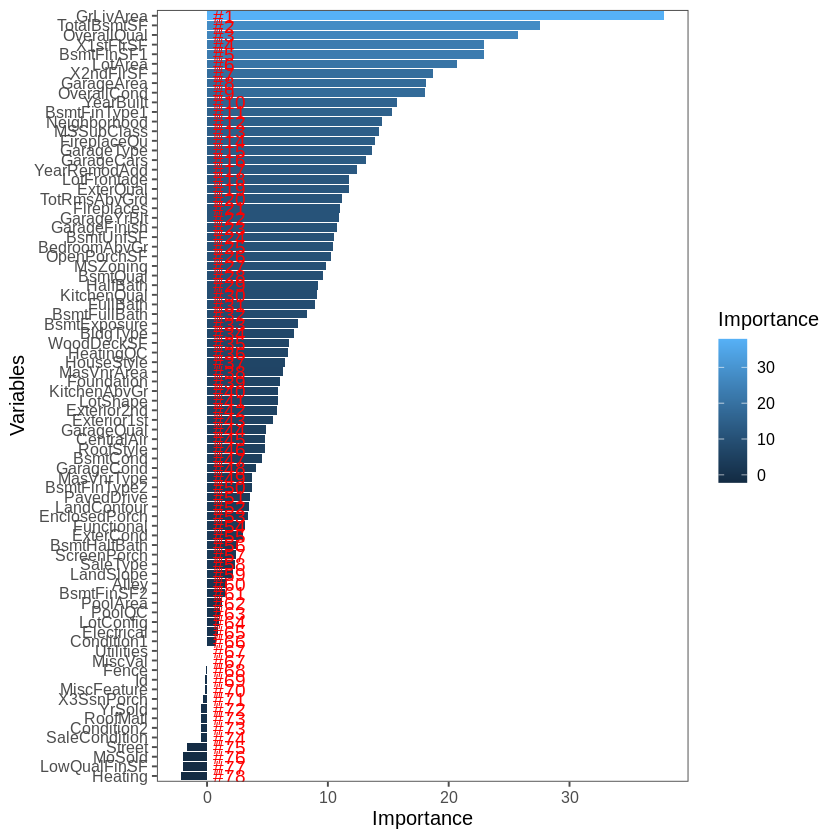

In [128]:
importance    <- importance(rf_model)
varImportance <- data.frame(Variables = row.names(importance), 
                            Importance = round(importance[ ,'%IncMSE'],2))

#  rank variable based on importance
rankImportance <- varImportance %>% mutate(Rank = paste0('#',dense_rank(desc(Importance))))

#  visualize the relative importance of variables
print("Plot of variable importance")
print("Variable importance of initial model")
ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
                           y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
            hjust=0, vjust=0.55, size = 4, colour = 'red') +
  labs(x = 'Variables') +
  coord_flip() + 
  theme_few()


Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


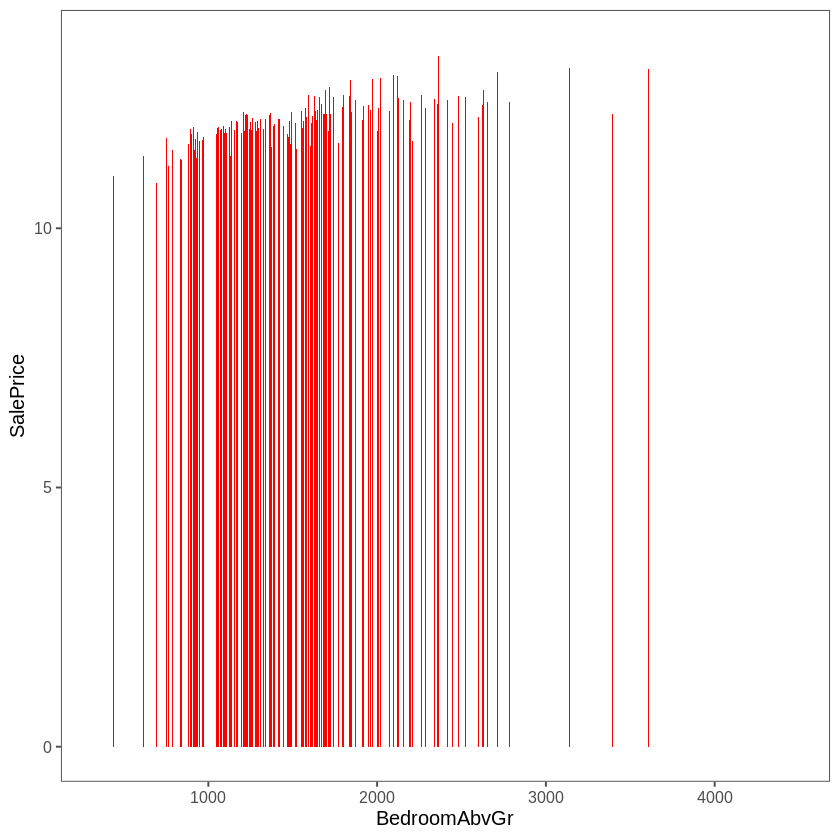

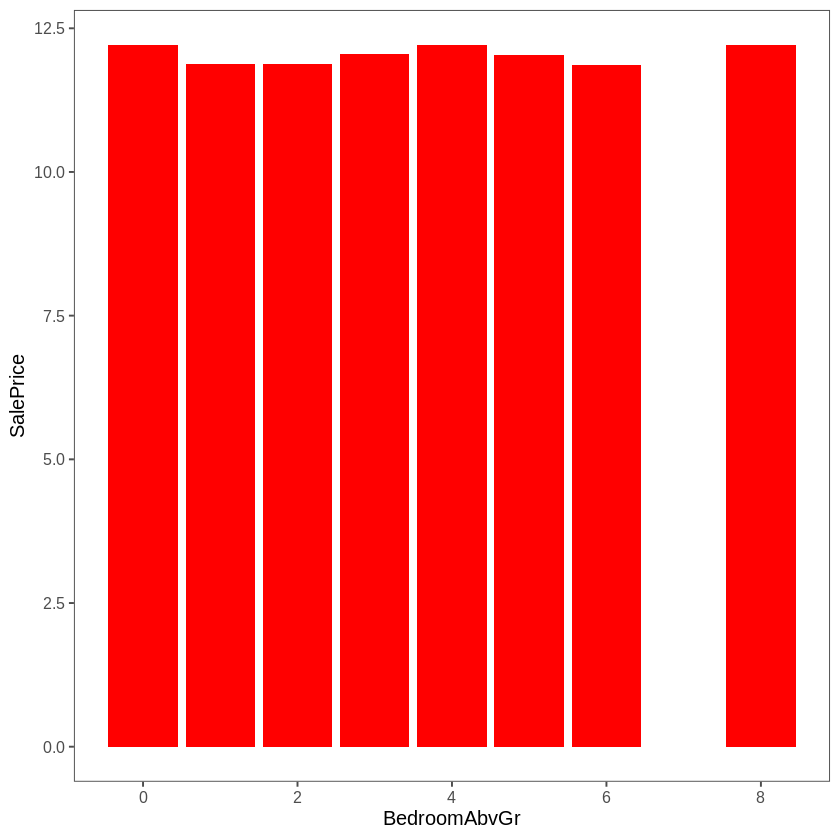

In [129]:
# From importance rank, Gr living area is the most important variable
# plot its relation with sale price
ggplot(house_train, aes(x = GrLivArea, y = SalePrice)) +
  geom_bar(stat='identity', position='dodge', fill='red') +
  labs(x = 'BedroomAbvGr') +
  theme_few()

ggplot(house_train, aes(x = BedroomAbvGr, y = SalePrice)) +
  stat_summary(fun.y = "mean", geom  = "bar", fill="red") +
  labs(x = 'BedroomAbvGr') +
  theme_few()

In [130]:
# model improvement; random forest
rf_model2 <- randomForest(SalePrice ~ GrLivArea + GarageArea + GarageCars + X2ndFlrSF + LotArea + FullBath + YearBuilt + ExterQual + FireplaceQu
                              + KitchenQual + GarageFinish + BsmtQual + GarageType  + OpenPorchSF + YearRemodAdd
                              + MSZoning + Exterior1st + HouseStyle + Fireplaces + BsmtUnfSF + WoodDeckSF + GarageYrBlt + GarageQual
                              + CentralAir ,
                              data = house_train,  importance = T)
print(rf_model2)
importance(rf_model2)
# prediction of randomforest model
prediction2 <- predict(rf_model2, data = house_test)
head(prediction2)


Call:
 randomForest(formula = SalePrice ~ GrLivArea + GarageArea + GarageCars +      X2ndFlrSF + LotArea + FullBath + YearBuilt + ExterQual +      FireplaceQu + KitchenQual + GarageFinish + BsmtQual + GarageType +      OpenPorchSF + YearRemodAdd + MSZoning + Exterior1st + HouseStyle +      Fireplaces + BsmtUnfSF + WoodDeckSF + GarageYrBlt + GarageQual +      CentralAir, data = house_train, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 8

          Mean of squared residuals: 0.02204026
                    % Var explained: 86.18


,%IncMSE,IncNodePurity
GrLivArea,53.738050,51.924607
GarageArea,24.299726,13.556916
GarageCars,17.407999,13.410780
X2ndFlrSF,22.165605,4.824368
LotArea,32.162944,9.301079
FullBath,12.645282,8.900844
YearBuilt,23.055502,31.605708
ExterQual,19.765672,17.612623
FireplaceQu,21.863702,7.740090
KitchenQual,12.770761,5.450128


1        2        3        4        5        6 
12.24890 11.99268 12.33604 12.04517 12.55739 12.04727

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



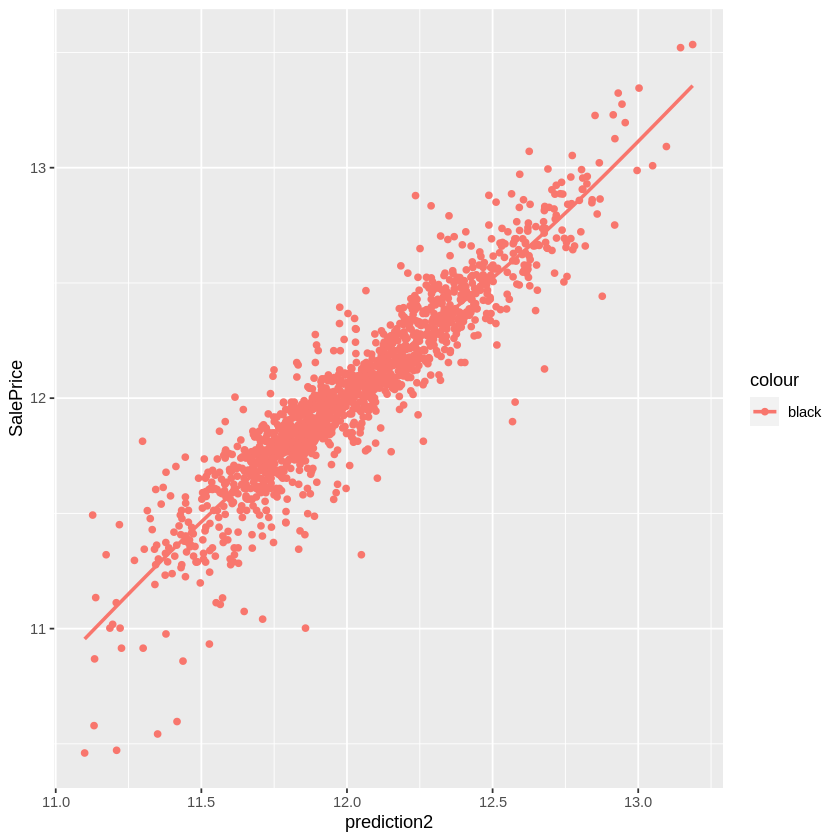

In [131]:
ggplot(data = house_train, mapping = aes(x = prediction2, 
                                 y = SalePrice,
                                 color = "black")) +
  geom_point() +
  geom_smooth(se=FALSE)